In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool1D, AvgPool1D, BatchNormalization, Reshape
from keras.layers import Activation
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
#GENERAR DATASET (TEST Y TRAIN)

n_dim = 10

X_train = np.empty((1000, n_dim, n_dim))
for c in range(1000):
  R = np.random.randint(-10,10,(n_dim,n_dim))
  max = np.max(R)
  R = R/max
  X_train[c] = R

X_train.shape 

X_test = np.empty((300,n_dim,n_dim))
for c in range(300):
  R = np.random.randint(-10,10,(n_dim,n_dim))
  max = np.max(R)
  R = R/max
  X_test[c] = R



Los datasets creados (Train y test) son matrices de tamaño 10 x 10, con elementos entre -10 y 10 que han sido normalizados dividiendo por el máximo de sus elementos. 
Para el conjunto de entrenamiento se tienen 1000 matrices y para el de testeo 300 matrices.

In [ ]:
Y_train = np.empty(1000)
for c in range(1000):
  Y_train[c] = sum(np.linalg.eigvals(X_train[c]))

Y_train.shape

Y_test = np.empty(300)
for c in range(300):
  Y_test[c] = sum(np.linalg.eigvals(X_test[c]))




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


Los target son definidos como la suma de los valores propios de cada matriz. Para el conjunto de entrenamiento se tiene un target que es un vector de 1000 elementos y para el de testeo lo mismo pero con un vector de 300 elementos.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)


(800, 10, 10) (200, 10, 10) (800,) (200,)


Se realiza un split en el conjunto de entrenamiento para generar el conjunto de validación, 80% para el conjunto de entrenamiento y 20% para el conjunto de validación.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(64, 4, input_shape=(n_dim,n_dim)))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Conv1D(64, 4))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=3))
model.add(tf.keras.layers.Conv1D(32, 2))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 7, 64)             2624      
_________________________________________________________________
activation_7 (Activation)    (None, 7, 64)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 4, 64)             16448     
_________________________________________________________________
activation_8 (Activation)    (None, 4, 64)             0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1, 32)             4128      
_________________________________________________________________
activation_9 (Activation)    (None, 1, 32)            

Red de referencia a utilizar.

In [ ]:
#model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.compile(optimizer='adam',loss='mean_squared_error')

history = model.fit(X_train,Y_train, epochs = 7, validation_data = (X_val,Y_val), verbose =1)



Epoch 1/7
25/25 [==============================] - 0s 7ms/step - loss: 4.1905 - val_loss: 3.2452
Epoch 2/7
25/25 [==============================] - 0s 4ms/step - loss: 2.9893 - val_loss: 2.0207
Epoch 3/7
25/25 [==============================] - 0s 4ms/step - loss: 1.2577 - val_loss: 1.0885
Epoch 4/7
25/25 [==============================] - 0s 4ms/step - loss: 0.6655 - val_loss: 0.9137
Epoch 5/7
25/25 [==============================] - 0s 4ms/step - loss: 0.3863 - val_loss: 0.8235
Epoch 6/7
25/25 [==============================] - 0s 4ms/step - loss: 0.2740 - val_loss: 0.8442
Epoch 7/7
25/25 [==============================] - 0s 4ms/step - loss: 0.1703 - val_loss: 0.7538


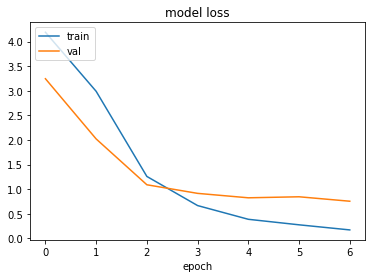

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
#plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_test)

mean_squared_error(Y_test,pred)

0.8728320013696806

Loss de la predicción de la red referencial: 0.87



### DROPOUT

#### Dropout antes de Pooling

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(64, 4, input_shape=(n_dim,n_dim)))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Conv1D(64, 4))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=3))
model.add(tf.keras.layers.Conv1D(32, 2))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('linear'))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

history = model.fit(X_train,Y_train, epochs = 30, validation_data = (X_val,Y_val), verbose =1)


Epoch 1/30
25/25 [==============================] - 0s 8ms/step - loss: 4.4474 - val_loss: 3.7207
Epoch 2/30
25/25 [==============================] - 0s 4ms/step - loss: 4.2430 - val_loss: 3.3248
Epoch 3/30
25/25 [==============================] - 0s 4ms/step - loss: 3.5280 - val_loss: 2.2511
Epoch 4/30
25/25 [==============================] - 0s 4ms/step - loss: 2.3679 - val_loss: 1.6143
Epoch 5/30
25/25 [==============================] - 0s 4ms/step - loss: 1.4238 - val_loss: 1.1491
Epoch 6/30
25/25 [==============================] - 0s 4ms/step - loss: 1.1918 - val_loss: 1.0628
Epoch 7/30
25/25 [==============================] - 0s 4ms/step - loss: 0.9765 - val_loss: 1.1264
Epoch 8/30
25/25 [==============================] - 0s 4ms/step - loss: 0.9120 - val_loss: 0.8638
Epoch 9/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6981 - val_loss: 0.8100
Epoch 10/30
25/25 [==============================] - 0s 4ms/step - loss: 0.5859 - val_loss: 0.8758
Epoch 11/30
25/25 [

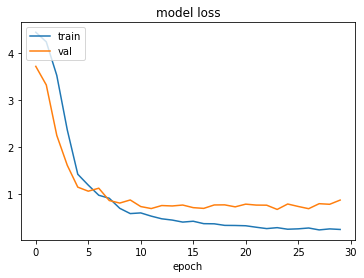

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_test)

mean_squared_error(Y_test,pred)

0.9210644682801313

Loss de la predicción de la red con dropout antes de pooling: 0.92

#### Dropout entre no linealidad y convolución

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(64, 4, input_shape=(n_dim,n_dim)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Conv1D(64, 4))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=3))
model.add(tf.keras.layers.Conv1D(32, 2))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('linear'))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

history = model.fit(X_train,Y_train, epochs = 20, validation_data = (X_val,Y_val), verbose =1)

Epoch 1/20
25/25 [==============================] - 0s 17ms/step - loss: 4.2336 - val_loss: 3.3887
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 3.9283 - val_loss: 2.9839
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 3.1764 - val_loss: 2.6391
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 2.3846 - val_loss: 1.7454
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 1.7767 - val_loss: 1.5324
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 1.6200 - val_loss: 1.3059
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 1.4162 - val_loss: 1.2490
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 1.2699 - val_loss: 1.1976
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 1.1445 - val_loss: 1.1033
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.9787 - val_loss: 1.0495
Epoch 11/20
25/25 

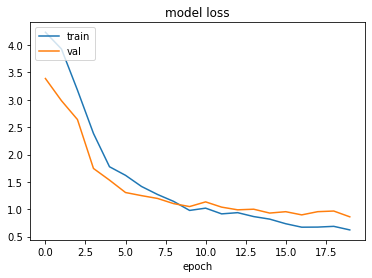

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_test)

mean_squared_error(Y_test,pred)

0.9706423813506615

Loss de la predicción de la red con dropout entre no linealidad y convolución: 0.97

#### Dropout antes de convolución

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(64, 4, input_shape=(n_dim,n_dim)))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv1D(64, 4))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=3))

model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv1D(32, 2))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('linear'))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

history = model.fit(X_train,Y_train, epochs = 20, validation_data = (X_val,Y_val), verbose =1)

Epoch 1/20
25/25 [==============================] - 0s 8ms/step - loss: 4.3729 - val_loss: 3.5512
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 4.1213 - val_loss: 3.3602
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 3.4888 - val_loss: 2.2390
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 2.3174 - val_loss: 1.5103
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 1.5261 - val_loss: 1.1353
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 1.2859 - val_loss: 1.0238
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 1.0805 - val_loss: 0.9655
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.9211 - val_loss: 0.8592
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.9557 - val_loss: 0.8266
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.8525 - val_loss: 0.7804
Epoch 11/20
25/25 [

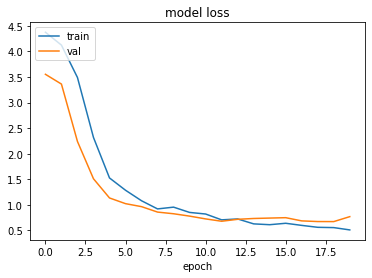

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_test)

mean_squared_error(Y_test,pred)

0.7689407482786692

Loss de la predicción de la red con dropout antes de la convolución: 0.76

### Batch Normalization 

#### Batch Normalization antes de la convolución

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(64, 4, input_shape=(n_dim,n_dim)))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(64, 4))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=3))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(32, 2))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('linear'))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

history = model.fit(X_train,Y_train, epochs = 15, validation_data = (X_val,Y_val), verbose =1)

Epoch 1/15
25/25 [==============================] - 0s 10ms/step - loss: 3.9061 - val_loss: 3.5071
Epoch 2/15
25/25 [==============================] - 0s 5ms/step - loss: 2.0122 - val_loss: 2.8536
Epoch 3/15
25/25 [==============================] - 0s 5ms/step - loss: 0.9459 - val_loss: 2.6345
Epoch 4/15
25/25 [==============================] - 0s 5ms/step - loss: 0.4896 - val_loss: 2.3681
Epoch 5/15
25/25 [==============================] - 0s 4ms/step - loss: 0.3136 - val_loss: 2.2265
Epoch 6/15
25/25 [==============================] - 0s 4ms/step - loss: 0.2385 - val_loss: 2.1314
Epoch 7/15
25/25 [==============================] - 0s 4ms/step - loss: 0.1664 - val_loss: 2.0299
Epoch 8/15
25/25 [==============================] - 0s 5ms/step - loss: 0.1729 - val_loss: 1.9506
Epoch 9/15
25/25 [==============================] - 0s 4ms/step - loss: 0.1239 - val_loss: 1.7752
Epoch 10/15
25/25 [==============================] - 0s 5ms/step - loss: 0.1335 - val_loss: 1.6644
Epoch 11/15
25/25 

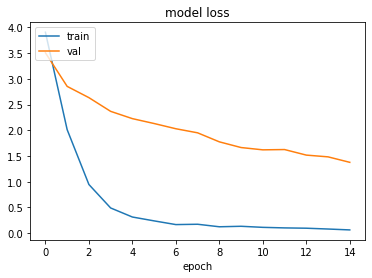

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_test)

mean_squared_error(Y_test,pred)

1.6201520881354072

Loss de la predicción de la red con Batchnormalization antes de la convolución: 1.62

#### Batch Normalization entre no linealidad y convolución

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(64, 4, input_shape=(n_dim,n_dim)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Conv1D(64, 4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=3))


model.add(tf.keras.layers.Conv1D(32, 2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('linear'))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

history = model.fit(X_train,Y_train, epochs = 15, validation_data = (X_val,Y_val), verbose =1)

Epoch 1/15
25/25 [==============================] - 0s 10ms/step - loss: 3.9595 - val_loss: 3.5410
Epoch 2/15
25/25 [==============================] - 0s 5ms/step - loss: 2.3301 - val_loss: 3.0899
Epoch 3/15
25/25 [==============================] - 0s 5ms/step - loss: 1.3111 - val_loss: 2.8833
Epoch 4/15
25/25 [==============================] - 0s 5ms/step - loss: 0.6679 - val_loss: 2.6049
Epoch 5/15
25/25 [==============================] - 0s 5ms/step - loss: 0.5226 - val_loss: 2.4622
Epoch 6/15
25/25 [==============================] - 0s 5ms/step - loss: 0.3253 - val_loss: 2.2629
Epoch 7/15
25/25 [==============================] - 0s 5ms/step - loss: 0.2468 - val_loss: 2.1437
Epoch 8/15
25/25 [==============================] - 0s 5ms/step - loss: 0.3312 - val_loss: 1.9523
Epoch 9/15
25/25 [==============================] - 0s 5ms/step - loss: 0.2403 - val_loss: 1.8439
Epoch 10/15
25/25 [==============================] - 0s 5ms/step - loss: 0.2652 - val_loss: 1.7647
Epoch 11/15
25/25 

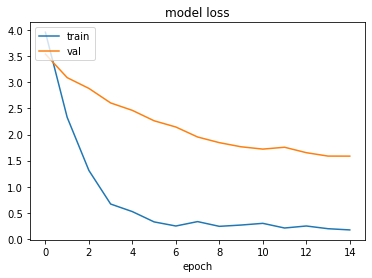

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_test)

mean_squared_error(Y_test,pred)

1.5826141950392587

Loss de la predicción de la red con Batchnormalization entre no linealidad y convolución: 1.58

### Modelo con ambos

#### Dropout antes de Pooling y Batchnormalization antes de la convolución

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(64, 4, input_shape=(n_dim,n_dim)))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(64, 4))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=3))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(32, 2))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('linear'))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

history = model.fit(X_train,Y_train, epochs = 20, validation_data = (X_val,Y_val), verbose =1)

Epoch 1/20
25/25 [==============================] - 0s 10ms/step - loss: 4.1911 - val_loss: 3.6891
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 3.5480 - val_loss: 3.4780
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 2.7458 - val_loss: 3.1583
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 1.9955 - val_loss: 2.9088
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 1.5387 - val_loss: 2.5555
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 1.2522 - val_loss: 2.2689
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 1.1613 - val_loss: 2.1688
Epoch 8/20
25/25 [==============================] - 0s 5ms/step - loss: 1.0588 - val_loss: 1.9756
Epoch 9/20
25/25 [==============================] - 0s 5ms/step - loss: 0.8929 - val_loss: 1.7823
Epoch 10/20
25/25 [==============================] - 0s 5ms/step - loss: 0.7931 - val_loss: 1.5678
Epoch 11/20
25/25 

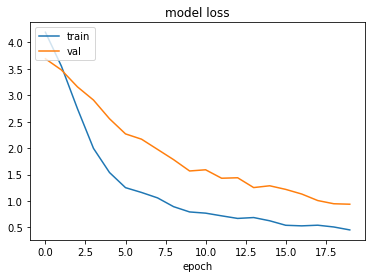

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_test)

mean_squared_error(Y_test,pred)

1.2379382340975367

Loss de la predicción de la red Dropout antes de Pooling y Batchnormalization antes de la convolución: 1.23

#### Dropout antes de Pooling y Batchnormalization entre no linealidad y convolución

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(64, 4, input_shape=(n_dim,n_dim)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Conv1D(64, 4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=3))
model.add(tf.keras.layers.Conv1D(32, 2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('linear'))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

history = model.fit(X_train,Y_train, epochs = 20, validation_data = (X_val,Y_val), verbose =1)

Epoch 1/20
25/25 [==============================] - 0s 10ms/step - loss: 4.0779 - val_loss: 3.5207
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 3.2933 - val_loss: 3.2316
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 2.3677 - val_loss: 2.8085
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 1.7776 - val_loss: 2.4614
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 1.3225 - val_loss: 2.1196
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 1.2485 - val_loss: 1.8626
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 1.1054 - val_loss: 1.8726
Epoch 8/20
25/25 [==============================] - 0s 5ms/step - loss: 1.0386 - val_loss: 1.5850
Epoch 9/20
25/25 [==============================] - 0s 5ms/step - loss: 0.9282 - val_loss: 1.5038
Epoch 10/20
25/25 [==============================] - 0s 5ms/step - loss: 0.9015 - val_loss: 1.2947
Epoch 11/20
25/25 

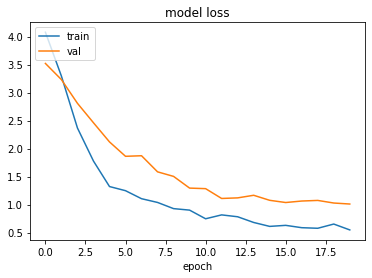

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_test)

mean_squared_error(Y_test,pred)

0.9750769146363494

Loss de la predicción de la red Dropout antes de Pooling y Batchnormalization entre no linealidad y convolución: 0,97

#### Dropout entre no linealidad y convolución y Batchnormalization antes de la convolución

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(64, 4, input_shape=(n_dim,n_dim)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(64, 4))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=3))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(32, 2))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('linear'))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

history = model.fit(X_train,Y_train, epochs = 30, validation_data = (X_val,Y_val), verbose =1)

Epoch 1/30
25/25 [==============================] - 0s 9ms/step - loss: 4.5124 - val_loss: 3.6766
Epoch 2/30
25/25 [==============================] - 0s 5ms/step - loss: 3.9680 - val_loss: 3.5755
Epoch 3/30
25/25 [==============================] - 0s 5ms/step - loss: 3.4839 - val_loss: 3.2737
Epoch 4/30
25/25 [==============================] - 0s 4ms/step - loss: 2.8822 - val_loss: 2.7453
Epoch 5/30
25/25 [==============================] - 0s 4ms/step - loss: 2.2664 - val_loss: 2.4511
Epoch 6/30
25/25 [==============================] - 0s 5ms/step - loss: 1.9860 - val_loss: 2.1393
Epoch 7/30
25/25 [==============================] - 0s 5ms/step - loss: 1.7400 - val_loss: 2.0480
Epoch 8/30
25/25 [==============================] - 0s 5ms/step - loss: 1.5059 - val_loss: 1.8527
Epoch 9/30
25/25 [==============================] - 0s 5ms/step - loss: 1.3923 - val_loss: 1.7064
Epoch 10/30
25/25 [==============================] - 0s 5ms/step - loss: 1.3159 - val_loss: 1.5425
Epoch 11/30
25/25 [

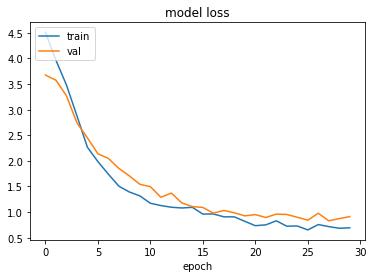

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_test)

mean_squared_error(Y_test,pred)

0.9735350007375257

Loss de la predicción de la red Dropout fijo entre no linealidad y convolución y Batchnormalization antes de la convolución: 0.97

#### Dropout antes de convolución y Batch Normalization entre no linealidad y convolución

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(64, 4, input_shape=(n_dim,n_dim)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv1D(64, 4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=3))

model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv1D(32, 2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool1D(padding = 'same',strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('linear'))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

history = model.fit(X_train,Y_train, epochs = 40, validation_data = (X_val,Y_val), verbose =1)

Epoch 1/40
25/25 [==============================] - 0s 10ms/step - loss: 4.4465 - val_loss: 3.6545
Epoch 2/40
25/25 [==============================] - 0s 5ms/step - loss: 3.9894 - val_loss: 3.4237
Epoch 3/40
25/25 [==============================] - 0s 5ms/step - loss: 3.4100 - val_loss: 2.9833
Epoch 4/40
25/25 [==============================] - 0s 5ms/step - loss: 2.5021 - val_loss: 2.3706
Epoch 5/40
25/25 [==============================] - 0s 5ms/step - loss: 1.8373 - val_loss: 2.0870
Epoch 6/40
25/25 [==============================] - 0s 5ms/step - loss: 1.6895 - val_loss: 1.7552
Epoch 7/40
25/25 [==============================] - 0s 5ms/step - loss: 1.4788 - val_loss: 1.6886
Epoch 8/40
25/25 [==============================] - 0s 5ms/step - loss: 1.3333 - val_loss: 1.4786
Epoch 9/40
25/25 [==============================] - 0s 5ms/step - loss: 1.1971 - val_loss: 1.3499
Epoch 10/40
25/25 [==============================] - 0s 5ms/step - loss: 1.2641 - val_loss: 1.3812
Epoch 11/40
25/25 

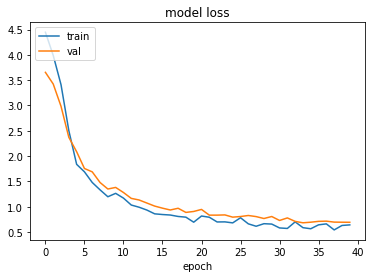

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_test)

mean_squared_error(Y_test,pred)

0.7062463913061818

Loss de la predicción de la red Dropout antes de convolución y Batch Normalization entre no linealidad y convolución: 0.70